In [23]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from time import time

# Python features

The following is a run-through of some features of python that are not obviously numerical features, but may be convenient to know about. If you want to learn more, I recommend:
* Actively search the internet for different approaches when you encounter a new problem
* Participate and ask questions on pages like stackoverflow:
 * https://stackoverflow.com/questions/tagged/python
 * https://physics.stackexchange.com/
 * https://scicomp.stackexchange.com/
* Check out the book *Fluent Python* by Luciano Ramalho

## f-strings

There are several different ways of producing strings of text from variables in python, but f-strings is the most modern and most convenient.

This is not particularly important for numerical purposes, but can be quite handy for printing nicely formatted output such as results of calculations, timing of computations, etc.

In [24]:
# Declare an f-string by adding f in front,
# and use {} to include other variables or evaluate expressions inside the string
a = 'hello'
print(a)
b = f'This is an f-string. {a}'
print(b)
c = f'This is another f-string. {3**2}'
print(c)

hello
This is an f-string. hello
This is another f-string. 9


In [26]:
# Different options for formatting the output exists
print(f'Use :5f (or another number) to limit number decimals: {np.pi:.5f}')
print(f'Use :5e (or another number) to limit number decimals, and print as power of 10: {np.pi:5e}')

Use :5f (or another number) to limit number decimals: 3.14159
Use :5e (or another number) to limit number decimals, and print as power of 10: 3.141593e+00


In [75]:
# Use < and > to align left and right within
# a specified number of spaces
print(f'An integer: {91283091823:>15}, and some more text.')
print(f'An integer: {9234:>15}, and some more text.')
print(f'An integer: {91283091823:<15}, and some more text.')
print(f'An integer: {9234:<15}, and some more text.')

An integer:     91283091823, and some more text.
An integer:            9234, and some more text.
An integer: 91283091823    , and some more text.
An integer: 9234           , and some more text.


In [27]:
R = np.random.normal(loc = 0, scale = 1000, size = 5)
for r in R:
    print(f'A random number: {r:9.3f}')

A random number: -1261.093
A random number:    26.874
A random number:  2543.489
A random number: -1566.385
A random number:    67.060


## List comprehensions

List comprehensions are a compact and convenient way of constructing lists.

In [28]:
# Make a list of the first 10 squares
a = [x**2 for x in range(1, 11)]
print(a)
print(f'type(a) = {type(a)}')

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
type(a) = <class 'list'>


In [29]:
# For numerical calculations, you will in practice
# usually turn the list into an array
# (note that in this example, the array is of integer type)
a = np.array([x**2 for x in range(1, 11)])
print(a)
print(f'type(a) = {type(a)}, a.dtype = {a.dtype}')

[  1   4   9  16  25  36  49  64  81 100]
type(a) = <class 'numpy.ndarray'>, a.dtype = int64


In [30]:
# Create a list of only the even squares
a = [x**2 for x in range(1, 11) if x % 2 == 0]
print(a)

[4, 16, 36, 64, 100]


In [97]:
# Create a list containing all possible pairs
# of elements from two other lists
A = np.arange(5)
B = np.arange(5)
C = [(a, b) for a in A for b in B]

print(C)

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]


In [33]:
# Use the above example to create an N x N multiplication table
N = 15
M = [a*b for a in range(1, N+1) for b in range(1, N+1)]
M = np.array(M).reshape(N, N)
print(M)

[[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15]
 [  2   4   6   8  10  12  14  16  18  20  22  24  26  28  30]
 [  3   6   9  12  15  18  21  24  27  30  33  36  39  42  45]
 [  4   8  12  16  20  24  28  32  36  40  44  48  52  56  60]
 [  5  10  15  20  25  30  35  40  45  50  55  60  65  70  75]
 [  6  12  18  24  30  36  42  48  54  60  66  72  78  84  90]
 [  7  14  21  28  35  42  49  56  63  70  77  84  91  98 105]
 [  8  16  24  32  40  48  56  64  72  80  88  96 104 112 120]
 [  9  18  27  36  45  54  63  72  81  90  99 108 117 126 135]
 [ 10  20  30  40  50  60  70  80  90 100 110 120 130 140 150]
 [ 11  22  33  44  55  66  77  88  99 110 121 132 143 154 165]
 [ 12  24  36  48  60  72  84  96 108 120 132 144 156 168 180]
 [ 13  26  39  52  65  78  91 104 117 130 143 156 169 182 195]
 [ 14  28  42  56  70  84  98 112 126 140 154 168 182 196 210]
 [ 15  30  45  60  75  90 105 120 135 150 165 180 195 210 225]]


## Tuples are immutable (unlike lists)

In [41]:
A = (1, 2, 'hello')

A[2] = 'hei'

TypeError: 'tuple' object does not support item assignment

In [43]:
A = [1, 2, 'hello']

A[2] = 'hei'

A

[1, 2, 'hei']

In [46]:
collision1 = (0.01, 1 , 4)
collision2 = (0.003, 2, 3)

collision2 < collision1

True

## Tuple unpacking

In [35]:
# A tuple is a collection of objects
A = (1, 2, 'hello')
print(f'type(A) = {type(A)}')

# A tuple can be unpacked:
a, b, c = A
print(f'a = {a}, b = {b}, c = {c}')

type(A) = <class 'tuple'>
a = 1, b = 2, c = hello


In [36]:
# By the way, unpacking also works with lists
A = [3, 4, 'hey']
a, b, c = A
print(f'a = {a}, b = {b}, c = {c}')

a = 3, b = 4, c = hey


In [39]:
# and with arrays (unpacks the first dimension first)
# typical use case: Split a (2,N) array with x and y positions
# into two separate vectors
N = 10
X = np.zeros((2, N))
x, y = X
print(f'x = {x}')
print(f'y = {y}')

x = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [48]:
# When a function returns more that one variable,
# it returns a tuple, which can be unpacked
def f(x, y):
    return 2*x, y**2

a = f(2,3)
print(f'type(a) = {type(a)}, a = {a}')

x, y = f(2, 3)
print(f'x = {x}, y = {y}')

type(a) = <class 'tuple'>, a = (4, 9)
x = 4, y = 9


In [50]:
a = (2,  3)

f(*a)

(4, 9)

## enumerate
A common use case is that you want to iterate through a list, and you want not only to access each element, but also it's index. There are many ways of doing this, but enumerate is a particularly elegant one (which makes use of tuple unpacking, see above).

In [115]:
def get_result(dt):
    # silly function just for example,
    # for a real example see the convergence tests
    # in notebooks 8 and 9
    return dt**2

# Let's say we want to do some calculation
# with a range of timesteps, and store the results
# in an array
timesteps = np.array([1, 2, 5, 10, 20, 50, 100])
results = np.zeros(len(timesteps))

# Loop over timesteps, and use enumerate
# to also get the index of each timestep.
# This works because enumerate returns tuples
# containing the index and the element.
for i, dt in enumerate(timesteps):
    results[i] = get_result(dt)
    
# An equivalent (but less pythonic) implementation:
for i in range(len(timesteps)):
    results[i] = get_result(timesteps[i])

# Another equivalent (but even less pythonic) implementation:
i = 0
for dt in timesteps:
    results[i] = get_result(dt)
    i += 1

## zip

zip can be useful when you want to combine elements from two lists into pairs, and operate on the pairs

In [123]:
def get_result(dx, dt):
    # Just a silly function for example
    # In reality this might solve a PDE or something
    return dx + dt

# Let's say you want to change both
# the timestep and the spatial resolution
dt_list = [1, 2, 5, 10, 20, 50, 100]
dx_list = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]

# Do calculation for each pair of parameters
for dx, dt in zip(dx_list, dt_list):
    get_result(dx, dt)
    
# This can also be combined with enumerate, as above,
# but note that we need an extra paranthesis, since
# enumerate here returns a two-element tuple where
# the second element is itself a two-element tuple:
# (i, (dx, dt))
results = np.zeros(len(dt_list))
for i, (dx, dt)  in enumerate(zip(dx_list, dt_list)):
    results[i] = get_result(dx, dt)

## Object orientation

When used sparingly, a bit of object orientation can be quite convenient. However, be aware that performance may suffer. As always, avoid for-loops when possible. As an example, in exercise 1 (a gas of particles in a box) it could be ok to make an object for the box, but making an object for each particle would render the code hopelessly inefficient.

When using object orientation, it can be very convenient to know about some special methods, such as ```__call__()``` or ```__lt__()``` that can make objects behave in useful ways. These methods are called double-underscore methods, or dunder methods for short.

### Callable objects

If you define the method ```__call__()``` on a python object, it can be called like a function. This is one (of several) ways to construct a function that can remember an internal state. This can be convenient, but be aware that it can also make debugging more complicated, since the same function can do different things depending on it's internal state.

In [51]:
# Create a simple object to do linear interpolation
# between two points (x0, y0) and (x1, y1)

class LinearInterpolator():
    def __init__(self, x0, y0, x1, y1):
        # Do a check to ensure x0 < x1,
        # this will give an error otherwise
        assert x0 < x1
        self.x0 = x0
        self.y0 = y0
        self.x1 = x1
        self.y1 = y1
        self.dx = (self.x1 - self.x0)
        self.dy = (self.y1 - self.y0)
    
    def __call__(self, x):
        y = self.y0 + self.dy*(x - self.x0)/self.dx
        return y

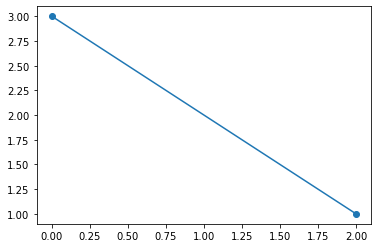

In [53]:
x0, y0 = 0, 3
x1, y1 = 2, 1

# Create interpolator object
F1 = LinearInterpolator(x0, y0, x1, y1)

# Plot original datapoints as dots
plt.scatter((x0, x1), (y0, y1))

# Draw a straight line from the linear interpolation
x = np.linspace(x0, x1, 100)
y = F1(x) # here we call the object as if it was a function
plt.plot(x, y)

In [54]:
# As another example, make an object that can
# count function calls and measure time spent in a function,
# by "wrapping" that function.

class CounterAndTimer():
    def __init__(self, function):
        self.function = function
        self.count = 0
        self.time = 0
    
    def __call__(self, *args, **kwargs):
        # the notation *args, **kwargs allows the function __call__
        # to accept any number of arguments and keyword arguments,
        # which can then be passed on to the function it wraps.
        self.count += 1
        tic = time()
        return_value = self.function(*args, **kwargs)
        toc = time()
        self.time += (toc - tic)
        return return_value
    
    def report(self):
        print(f'The function {self.function} has been called {self.count} times. This has taken {self.time:.5f} seconds')

In [55]:
from scipy.integrate import solve_ivp

The function <function f at 0x7f8ced3b6700> has been called 308 times. This has taken 0.00103 seconds


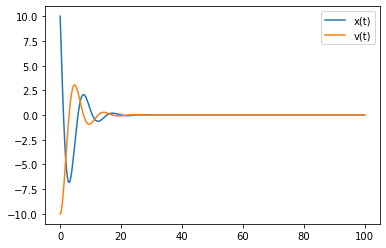

In [56]:
# Make a function defining an ODE
def f(t, X):
    # This is the same equation as was used in the
    # "stiff" example in notebook 09 on ODEs.
    # Set alpha to a higher value (e.g. 1000, or 10000)
    # To make the problem "stiffer"
    alpha = 0.5
    dX = np.zeros(2)
    dX[0] = X[1]
    dX[1] = alpha*(-X[0] - X[1])
    return dX

# "Wrap" this function with the object we defined
f = CounterAndTimer(f)

# Solve ode with solve_ivp from scipy
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
y0 = np.array([10.0, -10.0]) # Define initial conditions
sol = solve_ivp(f, (0, 100), y0, dense_output = True) # Set up problem
t = np.linspace(0, 100, 1001) # Time at which we want output
x = sol.sol(t) # Compute output
# Plot solution
plt.plot(t, x[0,:], label = 'x(t)')
plt.plot(t, x[1,:], label = 'v(t)')
plt.legend()

# Print results of counting and timing
f.report()

### Sortable objects

Defining the function ```__lt__()``` on your object will make the object sortable by the built-in sort method in python. Again using exercise 1 as an example: In this exercise, we will calculate a number of collisions, which will occur at some future time, and we wish to sort them (or actually store them in a queue) according to that time. Implementing the method ```__lt__()``` allows this to happen seamlessly.

In [59]:
#object1 < object2
# object1.__lt__(object2)

In [64]:
class Collision():
    # This is approximately how I chose to keep track
    # of collisions in my implementation of exercise 1
    
    def __init__(self, time, i, j, Ni, Nj):
        # Store time and the indices and collision counts
        # of the particles involved in the collision
        self.time = time
        self.i = i
        self.j = j
        self.Ni = Ni
        self.Nj = Nj
        
    def __lt__(self, other):
        # Return true if this collision occurs earlier
        # than the other collision it is compared to
        return self.time < other.time
    
    def __repr__(self):
        # Defining the __repr__() method to produce some useful info
        # when the object is printed
        return f'<Collision between {self.i} and {self.j} at time {self.time}>'

In [65]:
# make a list of three collisions
collisions = [
    Collision(1, 0, 1, 0, 0),
    Collision(3, 0, 1, 0, 0),
    Collision(2, 0, 1, 0, 0),
]

# Sort the list of collisions.
# The built-in sort uses the < operator,
# which in turn calls the __lt__() method.
collisions.sort()

# Print sorted list
# Note that the printed output comes from __repr__()
print(collisions)

[<Collision between 0 and 1 at time 1>, <Collision between 0 and 1 at time 2>, <Collision between 0 and 1 at time 3>]


## Closures

Another way of creating a function which can remember an internal state is to use "closures". This essentially involves writing a function that defines and returns another function. It can be convenient for some cases, like counting exectutions or timing, as we saw above. However, it is not at all transparent, so it can be a bit difficult to debug. Use with caution.

In [67]:
# A simple example first, a function that adds
# all the numbers we give to it

def make_adder():
    # In the outer scope, define a variable
    # to keep track of the running total
    total = 0
    
    # Then, define a function that will add to the total
    def adder(x):
        # use the keyword 'nonlocal' to get access to
        # the variable defined in the outer scope
        nonlocal total
        total += x
        return total
    
    # Finally, return the adder function
    return adder

adder = make_adder()

print('type(adder) = ', type(adder))

# Then, the function adder will keep adding,
# and store the result in the now inaccessible variable total
print(adder(2))
print(adder(2))
print(adder(2))

type(adder) =  <class 'function'>
2
4
6


In [72]:
# Note that it is technically possible to access the variable directly,
# but it's not exactly convenient. If you want direct access to the stored
# variables, a classical object is the way to go.
print(adder.__code__.co_freevars)
print(adder.__closure__[0].cell_contents)

('total',)
45


In [73]:
# Time-and-counter example, as above,
# but without defining a new class
def make_timer_and_counter(function):
    count = 0
    total_time = 0
    def timer_and_counter(*args, print_statistics = False, **kwargs):
        # Use the keyword 'nonlocal' to get access
        # to variables in the outer scope
        nonlocal function, count, total_time
        
        # If print_statistics is True,
        # print the accumulated count and time
        if print_statistics:
            print(f'The function {function} has been called {count} times. This has taken {total_time:.5f} seconds')
        else:
            # Run the wrapped function normally
            count += 1
            tic = time()
            return_value = function(*args, **kwargs)
            toc = time()
            total_time += (toc - tic)
            return return_value
    return timer_and_counter

The function <function f at 0x7f8ced604af0> has been called 308 times. This has taken 0.00086 seconds


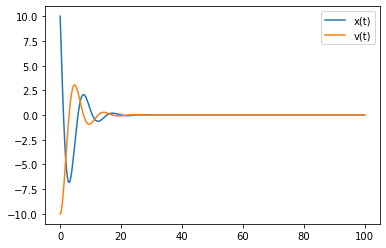

In [74]:
# Make a function defining an ODE
def f(t, X):
    # This is the same equation as was used in the
    # "stiff" example in notebook 09 on ODEs.
    # Set alpha to a higher value (e.g. 1000, or 10000)
    # To make the problem "stiffer"
    alpha = 0.5
    dX = np.zeros(2)
    dX[0] = X[1]
    dX[1] = alpha*(-X[0] - X[1])
    return dX

# "Wrap" this function with the object we defined
f = make_timer_and_counter(f)

# Solve ode with solve_ivp from scipy
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
y0 = np.array([10.0, -10.0]) # Define initial conditions
sol = solve_ivp(f, (0, 100), y0, dense_output = True) # Set up problem
t = np.linspace(0, 100, 1001) # Time at which we want output
x = sol.sol(t) # Compute output
# Plot solution
plt.plot(t, x[0,:], label = 'x(t)')
plt.plot(t, x[1,:], label = 'v(t)')
plt.legend()

# Print results of counting and timing
f(print_statistics = True)

## Pandas

Pandas is not a typical numerical library, but it is still extremely convenient for many things. It defines a concept called a DataFrame, which is essentially a table with named columns, and you can do different operations on the table. Here I just show a few simple examples.

In [76]:
# This requires that you have the pandas library installed
import pandas as pd

In [80]:
# Read a csv file (csv = comma-separated values)
# into a DataFrame.
df = pd.read_csv('../files/csv_example.txt', skipinitialspace = True)
print(df)

    Timestep     Result         Error   Runtime
0   0.000010  14.778112  6.826362e-11  2.889574
1   0.000032  14.778112  3.671552e-11  0.874791
2   0.000100  14.778112  2.936318e-12  0.272914
3   0.000316  14.778112  3.385736e-12  0.087540
4   0.001000  14.778112  1.390887e-12  0.027484
5   0.003162  14.778112  2.422063e-11  0.008480
6   0.010000  14.778112  2.442587e-09  0.002678
7   0.031623  14.778112  2.389705e-07  0.000845
8   0.100000  14.778090  2.266311e-05  0.000283
9   0.316228  14.776314  1.798332e-03  0.000099
10  1.000000  14.670139  1.079733e-01  0.000046


<AxesSubplot:>

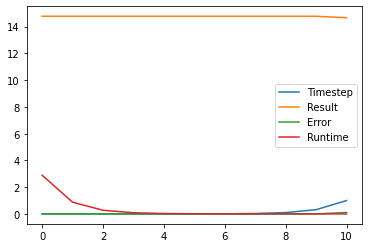

In [169]:
# You can plot directly from the dataframe.
# Plot all columns as a function of index
df.plot()

<AxesSubplot:xlabel='Timestep'>

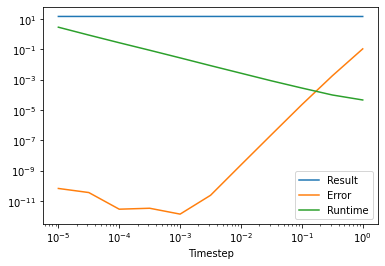

In [81]:
# Plot all other columns as function of timestep,
# and use log scale on both axes
df.plot(x = 'Timestep', logx = True, logy = True)

<AxesSubplot:xlabel='Timestep'>

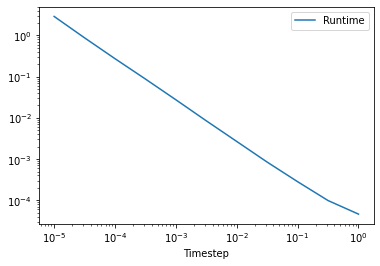

In [82]:
# Plot all other columns as function of timestep,
# and use log scale on both axes
df.plot(x = 'Timestep', y = 'Runtime', logx = True, logy = True)

## Logging

It can be convenient, particularly for debugging larger codes, to have some kind of logging that outputs information about what the program does. Print statements can work fine, but using a dedicated logging library has some advantages:
* Easy to turn output on and off
* Log messages can have several levels of importance, and you can choose which ones to display
* Easy to switch between writing to file and writing to terminal
* Easy to get features like timestamps

Check out documentation of the built-in logging features in python at https://docs.python.org/3/howto/logging.html#logging-basic-tutorial

In [85]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

def euler(X, t, h, f):
    logging.debug(f'This is the euler function, arguments were X = {X}, t = {t}, h = {h}, f = {f}')
    return X + h*f(X, t)

def run(X, Tmax, h, f):
    logging.info('This is the run function, starting simulation')
    t = 0
    while t < Tmax:
        if t + h > Tmax:
            logging.debug(f'This is the run function, t + h = {t + h} > Tmax = {Tmax}, adjusting timestep')
            h = Tmax - t
        X = euler(X, t, h, f)
        t += h
    logging.info('This is the run function, simulation finished')
    return X

def f(x, t):
    return -x

X0 = 10
Tmax = 1.5
h = 0.2
X = run(X0, Tmax, h, f)

INFO:root:This is the run function, starting simulation
INFO:root:This is the run function, simulation finished


## Progress bar

A simple progress bar can be a very nice feature, which allows you to tell if your program is actually doing anything, or if it is stuck, and it can tell you the estimated remaining time.

There are many different versions (and you can even write your own, if you want), but my current favourite is ```tqdm```:
* It is extremely simple to use
* It has very low overhead (i.e., it takes very little time to updated the progress bar)
* It works both in notebooks and in scripts run from the command line

In [87]:
# Easiest way to use tqdm: Replace range with trange
from tqdm import trange

x = 0
for i in trange(10000000):
    x = x + i

100%|██████████| 10000000/10000000 [00:02<00:00, 3339766.87it/s]


In [88]:
# Next easiest way, when you want to iterate over a list (or array or tuple):
# use tqdm to wrap the list
from tqdm import tqdm

# Create a list
A = [i for i in range(1000000)]

# iterate over wrapped list
x = 0
for a in tqdm(A):
    x = x + a

100%|██████████| 1000000/1000000 [00:00<00:00, 2616793.56it/s]


## Command line arguments

It can be very convenient to have your program accept arguments from the command line, so you don't have to change the program in order to change, e.g., numerical parameters.

See examples in ```../scripts/commandline_arguments.py```